## Esto es un cuaderno de Python ("iPython notebook" o "Jupyter notebook")

Esta divido en "cells" o celdas donde podemos escribir código.

Hay dos tipos de celdas. Celdas de codigo y celdas de texto

In [4]:
# esta es una celda de texto. vamos a imprimir algo. 
print('Hola mundo')

Hola mundo


## Vamos a guardar dos listas de numeros en una "variable": 

In [10]:
x_data = [1,3,5,7,9,11,13,15]

y_data = [15,13,11,9,7,5,3,1]

## Podemos importar librerias con herramientas (funciones) que vamos a usar:

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mi primera figura con Python')

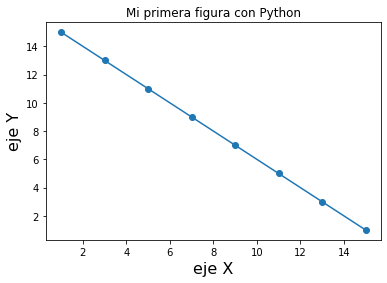

In [22]:
plt.plot(x_data, y_data, '-o')
plt.xlabel('eje X', fontsize = 16)
plt.ylabel('eje Y', fontsize = 16)
plt.title('Mi primera figura con Python')

## Una libreria que vamos a usar para analisis de datos se llama Pandas (Python Data Analysis Library)

In [23]:
import pandas as pd

Con pandas podemos leer "bases de datos" - e.g. hojas de excel o archivos formato .csv (comma separated values) con chorros de datos.


Como estamos trabajando en las computadoras de Google en la "nube", vamos a importar nuestros datos de unos "github repositories" (no te preocupes si no entiendes esta parte, solo estamos jalando unos datos para poder leerlos)

In [32]:
!wget https://raw.githubusercontent.com/beangoben/workshop_template/master/colab_utils.py -O colab_utils.py
!rm -rf sample_data
import colab_utils

--2021-01-19 18:51:08--  https://raw.githubusercontent.com/beangoben/workshop_template/master/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7173 (7.0K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   7.00K  --.-KB/s    in 0s      

2021-01-19 18:51:09 (61.1 MB/s) - ‘colab_utils.py’ saved [7173/7173]



In [33]:
github_repo = 'https://github.com/ajinich/tcj_2021_data'
colab_utils.clone_repo(github_repo)

CMD: git clone --recursive https://github.com/ajinich/tcj_2021_data


## Ahora aparece en el folder de archivos uno que se llama "tuberculosis-death-rates.csv", vamos a leerlos con Pandas


In [34]:
df_data = pd.read_csv('tuberculosis-death-rates.csv')

In [35]:
df_data.head()

,Entity,Code,Year,Rate
0,Afghanistan,AFG,1990,52.233775
1,Afghanistan,AFG,1991,50.921457
2,Afghanistan,AFG,1992,49.127851
3,Afghanistan,AFG,1993,48.917753
4,Afghanistan,AFG,1994,49.970905


Algo muy util es aprender a filtrar los datos. Por ejemplo, solo nos interesan los datos de Mexico y de Sudafrica: 

In [37]:
df_MX = df_data[df_data.Entity == 'Mexico']
df_SA = df_data[df_data.Entity == 'South Africa']

In [38]:
df_MX.head(5)

,Entity,Code,Year,Rate
3668,Mexico,MEX,1990,13.568954
3669,Mexico,MEX,1991,12.466743
3670,Mexico,MEX,1992,11.645780
3671,Mexico,MEX,1993,10.700633
3672,Mexico,MEX,1994,9.753710


Text(0, 0.5, 'TB death rate')

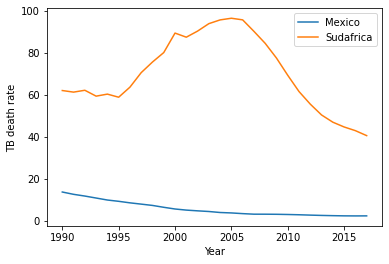

In [43]:
plt.plot(df_MX.Year, df_MX.Rate)
plt.plot(df_SA.Year, df_SA.Rate)
plt.legend(['Mexico', 'Sudafrica'])
plt.xlabel('Year')
plt.ylabel('TB death rate')